# Credit Risk Loan Prediction
**Wahyu Dwi Nugraha**

In [ ]:
# Mounting notebook to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Business Understanding
In this project, id/x partners company need to build model that able to predict customers credit loan. Model is achieved by applied data science workflow which i learned in internship program. Dataset is given by id/x partners company which contains many parameters and loan status of past credit loan.

## 2. Data Extraction and Analytical Interpretation

In [1]:
# Import python library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read csv file in google colab
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

/var/folders/mz/_h5zh2w56xncy1rm6lq19vk80000gn/T/ipykernel_20410/2466534173.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## 3. Feature Engineering

In [4]:
# create df_FE by copy from df
df_FE = df.copy()

### a). Check target variable

In [5]:
# Check data in column loan status
df_FE['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

From column loan_status, we know that there are several categorical data. The aim of this project is to predict loan should be given to debtor or not. So we can get two categorical history data that indicate loan is given or not to debtor, which are charged off for loan should not be given to debtor and fully paid for loan should be given to debtor.

In [6]:
# Take loan status that indicate charged off and fully paid, then remove others
loanstatus_condition_drop = df_FE[(df_FE['loan_status'] == 'Current') | (df_FE['loan_status'] == 'Late (31-120 days)') | (df_FE['loan_status'] == 'In Grace Period')
                            | (df_FE['loan_status'] == 'Late (16-30 days)') | (df_FE['loan_status'] == 'Default')]

df_FE = df_FE.drop(loanstatus_condition_drop.index, axis=0)

In [12]:
df_FE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229963 entries, 0 to 466283
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   229963 non-null  int64  
 1   id                           229963 non-null  int64  
 2   member_id                    229963 non-null  int64  
 3   loan_amnt                    229963 non-null  int64  
 4   funded_amnt                  229963 non-null  int64  
 5   funded_amnt_inv              229963 non-null  float64
 6   term                         229963 non-null  object 
 7   int_rate                     229963 non-null  float64
 8   installment                  229963 non-null  float64
 9   grade                        229963 non-null  object 
 10  sub_grade                    229963 non-null  object 
 11  emp_title                    217101 non-null  object 
 12  emp_length                   221256 non-null  object 
 13 

### b). Handle missing value

In [7]:
# Drop column with very less of data (less than 30 % of total data)
df_FE = df_FE.drop(['desc','mths_since_last_record','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m',
                    'open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m',
                    'open_rv_24m','int_rate','max_bal_bc','all_util', 'inq_fi','total_rec_int','total_cu_tl','inq_last_12m',
                    'mths_since_last_major_derog','mths_since_last_delinq','next_pymnt_d'], axis=1)

# 20  desc                         125983 non-null  object
# 30  mths_since_last_record       62638 non-null   float64
# 54  annual_inc_joint             0 non-null       float64
# 55  dti_joint                    0 non-null       float64
# 56  verification_status_joint    0 non-null       float64
# 60  open_acc_6m                  0 non-null       float64
# 61  open_il_6m                   0 non-null       float64
# 62  open_il_12m                  0 non-null       float64
# 63  open_il_24m                  0 non-null       float64
# 64  mths_since_rcnt_il           0 non-null       float64
# 65  total_bal_il                 0 non-null       float64
# 66  il_util                      0 non-null       float64
# 67  open_rv_12m                  0 non-null       float64
# 68  open_rv_24m                  0 non-null       float64
# 69  max_bal_bc                   0 non-null       float64
# 70  all_util                     0 non-null       float64
# 72  inq_fi                       0 non-null       float64
# 73  total_cu_tl                  0 non-null       float64
# 74  inq_last_12m                 0 non-null       float64
# 51  mths_since_last_major_derog  98974 non-null   float64

In [8]:
# Remove unnecessary columns
df_FE = df_FE.drop(['Unnamed: 0', 'id', 'member_id', 'emp_title', 'issue_d', 'url', 'title', 'addr_state', 'zip_code',
                   'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'], axis=1)

In dataframe, still there are almost same data contain on some features. If we do outliers handling to this data, it can break others data in whole dataframe. So, i decided to remove this features.

In [9]:
# Remove columns which almost have same values of all data of each column
df_FE = df_FE.drop(['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'out_prncp', 'out_prncp_inv', 'application_type',
                   'collection_recovery_fee', 'recoveries', 'tot_coll_amt', 'total_rec_late_fee', 'pub_rec', 'delinq_2yrs'], axis=1)

In [17]:
df_FE.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
installment                0
grade                      0
sub_grade                  0
emp_length              8707
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
pymnt_plan                 0
purpose                    0
dti                        0
inq_last_6mths            29
open_acc                  29
revol_bal                  0
revol_util               226
total_acc                 29
initial_list_status        0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
last_pymnt_amnt            0
tot_cur_bal            66457
total_rev_hi_lim       66457
dtype: int64

In [18]:
# Show only object features
df_FE.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229963 entries, 0 to 466283
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 229963 non-null  object
 1   grade                229963 non-null  object
 2   sub_grade            229963 non-null  object
 3   emp_length           221256 non-null  object
 4   home_ownership       229963 non-null  object
 5   verification_status  229963 non-null  object
 6   loan_status          229963 non-null  object
 7   pymnt_plan           229963 non-null  object
 8   purpose              229963 non-null  object
 9   initial_list_status  229963 non-null  object
dtypes: object(10)
memory usage: 19.3+ MB


- **Handle columns emp title and emp length**

In [19]:
# Check data category of column emp_length
df_FE['emp_length'].value_counts()

10+ years    68498
2 years      21588
< 1 year     19262
3 years      18694
5 years      16770
1 year       15510
4 years      14898
6 years      13803
7 years      12984
8 years      10644
9 years       8605
Name: emp_length, dtype: int64

In [ ]:
# Check data category of column home_ownership
df_FE['home_ownership'].value_counts()

MORTGAGE    113276
RENT         97194
OWN          19265
OTHER          179
NONE            48
ANY              1
Name: home_ownership, dtype: int64

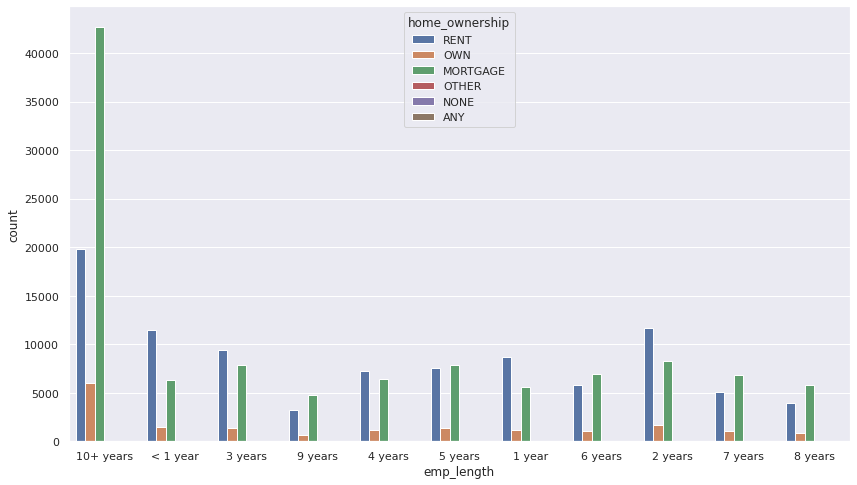

In [21]:
# Create countplot of column emp_length and home_ownership
plt.figure(figsize=(14,8))
sns.set()
sns.countplot(x='emp_length', hue='home_ownership', data=df_FE)

From internet article of 'MORTGAGE', we know that mortgage is long term credit loan where the debtor should give a guarantee stuff to creditor.

There are several rule to give a mortgage to debtor, namely :
1. There are two people, debtor and creditor.
2. Should take long time (approximately in 10-30 years).
3. Creditor can confiscate mortgage payable if debtor can't pay off his loan.

Source : https://www.ocbcnisp.com/en/article/2021/11/10/mortgage-adalah#:~:text=Mortgage%20adalah%20pemberian%20pinjaman%20berupa,berhak%20menempati%20aset%20yang%20dijaminkan.

Based on mortgage explanation above, we may know that mortgage is long term loan with expensive guarantee stuff like building. This loan usually take by people who have a lot of money. From countplot we also know that most of people who have 10+ years experience take mortgage loan. This show that there are correlation between 10+ years experience with mortgage loan, which is people with 10+ years experience generally have a lot of money to take mortgage loan. So, i decided to fill emp_length missing value ONLY which have correlation with 'MORTGAGE' with '10+ years experience'.

In [22]:
# Data with NaN column emp_length and mortgage home_ownership
df_FE[(df_FE['home_ownership'] == 'MORTGAGE') & (df_FE['emp_length'].isnull())]

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
323,18000,18000,18000.0,60 months,452.98,D,D4,NaN,MORTGAGE,60000.0,...,5945,83.7,28.0,f,26369.525520,26369.53,18000.00,6909.59,NaN,NaN
439,8250,8250,8250.0,36 months,256.67,A,A3,NaN,MORTGAGE,31500.0,...,7521,10.4,37.0,f,9236.369059,9236.37,8250.00,278.92,NaN,NaN
534,1700,1700,1700.0,36 months,53.20,A,A4,NaN,MORTGAGE,37800.0,...,16333,91.2,27.0,f,1218.500000,1218.50,940.44,53.20,NaN,NaN
555,5000,5000,5000.0,36 months,158.77,A,A5,NaN,MORTGAGE,70000.0,...,8901,53.0,32.0,f,5651.830000,5651.83,5000.00,1689.20,NaN,NaN
562,3000,3000,3000.0,36 months,96.68,B,B1,NaN,MORTGAGE,42000.0,...,5289,33.3,3.0,f,3479.273807,3479.27,3000.00,101.19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465935,28200,28200,28200.0,36 months,1013.43,D,D2,NaN,MORTGAGE,60000.0,...,22139,72.3,19.0,f,30900.962440,30900.96,28200.00,24820.58,119938.0,30600.0
466254,6000,6000,6000.0,60 months,170.53,E,E5,NaN,MORTGAGE,45600.0,...,1199,14.6,13.0,f,511.490000,511.49,163.71,170.53,1199.0,8200.0
466262,14000,14000,14000.0,36 months,493.86,C,C5,NaN,MORTGAGE,68000.0,...,14145,58.0,47.0,f,16935.850130,16935.85,14000.00,8046.50,197078.0,24400.0
466265,32000,32000,31975.0,36 months,1001.29,A,A4,NaN,MORTGAGE,128000.0,...,5400,17.5,35.0,f,34606.234310,34579.20,32000.00,20463.91,334899.0,30800.0


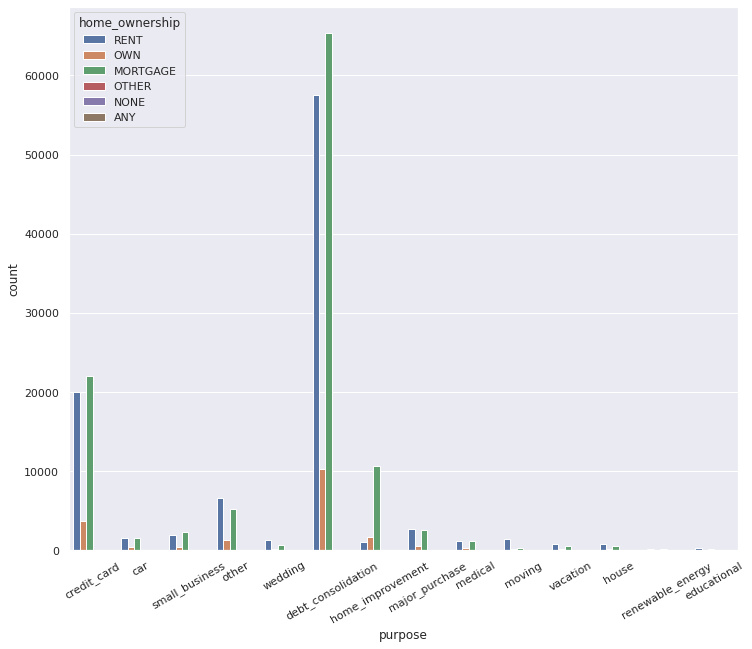

In [23]:
plt.figure(figsize=(12,10))
purpose_homeownership = sns.countplot(data=df_FE, x='purpose', hue='home_ownership')
purpose_homeownership.tick_params(axis='x', labelrotation = 30)

From countplot above, we know that are relationship between column purpose and home_ownership. Showed in the graph that data 'debt_consolidation' category has much value related to 'MORTGAGE' category of home_ownership column, which is 'MORTGAGE' category has a relationship with '10+ years' category of column emp_length too. So, we can fill missing value of column emp_length with '10+ years' category related to above condition.

In [24]:
# Check how many rows empty in column emp_length related to condition of home_ownership and purpose
df_FE['emp_length'][(df_FE['purpose'] == 'debt_consolidation') | (df_FE['home_ownership'] == 'MORTGAGE')].isnull().sum()

6524

In [10]:
# fill column emp_length with condition home_ownership is 'MORTGAGE' and purpose is 'debt_consolidation'
condition_emplength_homeownership_purpose = (df_FE['home_ownership'] == 'MORTGAGE') | (df_FE['purpose'] == 'debt_consolidation')
df_FE['emp_length'] = df_FE['emp_length'].fillna(condition_emplength_homeownership_purpose.map({True: '10+ years'}))

In [26]:
df_FE.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
installment                0
grade                      0
sub_grade                  0
emp_length              2183
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
pymnt_plan                 0
purpose                    0
dti                        0
inq_last_6mths            29
open_acc                  29
revol_bal                  0
revol_util               226
total_acc                 29
initial_list_status        0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
last_pymnt_amnt            0
tot_cur_bal            66457
total_rev_hi_lim       66457
dtype: int64

In [27]:
df_FE.select_dtypes(include=['float64','int64']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229963 entries, 0 to 466283
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amnt         229963 non-null  int64  
 1   funded_amnt       229963 non-null  int64  
 2   funded_amnt_inv   229963 non-null  float64
 3   installment       229963 non-null  float64
 4   annual_inc        229959 non-null  float64
 5   dti               229963 non-null  float64
 6   inq_last_6mths    229934 non-null  float64
 7   open_acc          229934 non-null  float64
 8   revol_bal         229963 non-null  int64  
 9   revol_util        229737 non-null  float64
 10  total_acc         229934 non-null  float64
 11  total_pymnt       229963 non-null  float64
 12  total_pymnt_inv   229963 non-null  float64
 13  total_rec_prncp   229963 non-null  float64
 14  last_pymnt_amnt   229963 non-null  float64
 15  tot_cur_bal       163506 non-null  float64
 16  total_rev_hi_lim  16

- **Column tot_cur_bal**

In [28]:
df_FE['tot_cur_bal'].describe()

count    1.635060e+05
mean     1.373521e+05
std      1.508180e+05
min      0.000000e+00
25%      2.801825e+04
50%      8.046050e+04
75%      2.076438e+05
max      8.000078e+06
Name: tot_cur_bal, dtype: float64

In [ ]:
# Check amount of data with condition
df_FE[df_FE['tot_cur_bal'] > 1*(10**6)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
42698,35000,35000,35000.0,36 months,1223.77,C,C4,4 years,MORTGAGE,425000.0,...,40847,95.4,31.0,f,42049.65652,42049.66,35000.00,18798.12,1094366.0,42200.0
43028,12250,12250,12250.0,36 months,393.38,B,B1,2 years,MORTGAGE,135000.0,...,76126,60.4,28.0,f,13127.88615,13127.89,12250.00,9587.77,1162719.0,126100.0
46245,20000,20000,20000.0,36 months,679.00,B,B5,10+ years,MORTGAGE,328000.0,...,306974,81.0,39.0,w,21469.08183,21469.08,20000.00,17395.08,1003520.0,378800.0
46764,26000,26000,26000.0,60 months,565.18,B,B2,2 years,MORTGAGE,220000.0,...,24034,72.2,27.0,w,30789.19000,30789.19,26000.00,18237.39,1054073.0,88300.0
47049,21200,21200,21200.0,60 months,633.36,G,G3,10+ years,MORTGAGE,240000.0,...,109570,80.0,23.0,f,26005.98991,26005.99,21200.00,19675.69,1148478.0,127500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465477,35000,35000,34950.0,36 months,1223.77,C,C4,10+ years,MORTGAGE,218000.0,...,116651,97.0,47.0,f,37972.05138,37917.81,35000.00,30630.64,1054761.0,162800.0
465577,28000,28000,28000.0,36 months,963.38,C,C2,10+ years,MORTGAGE,650000.0,...,148690,76.0,46.0,w,31905.40000,31905.40,28000.00,20344.84,1696821.0,196100.0
465705,19000,19000,19000.0,60 months,495.18,D,D4,9 years,MORTGAGE,265000.0,...,13962,61.1,59.0,f,21064.22921,21064.23,19000.00,18093.23,1087812.0,37300.0
466007,35000,35000,35000.0,60 months,869.66,D,D1,5 years,MORTGAGE,332500.0,...,39253,62.5,40.0,f,42834.25000,42834.25,34999.97,28919.77,1161815.0,62800.0


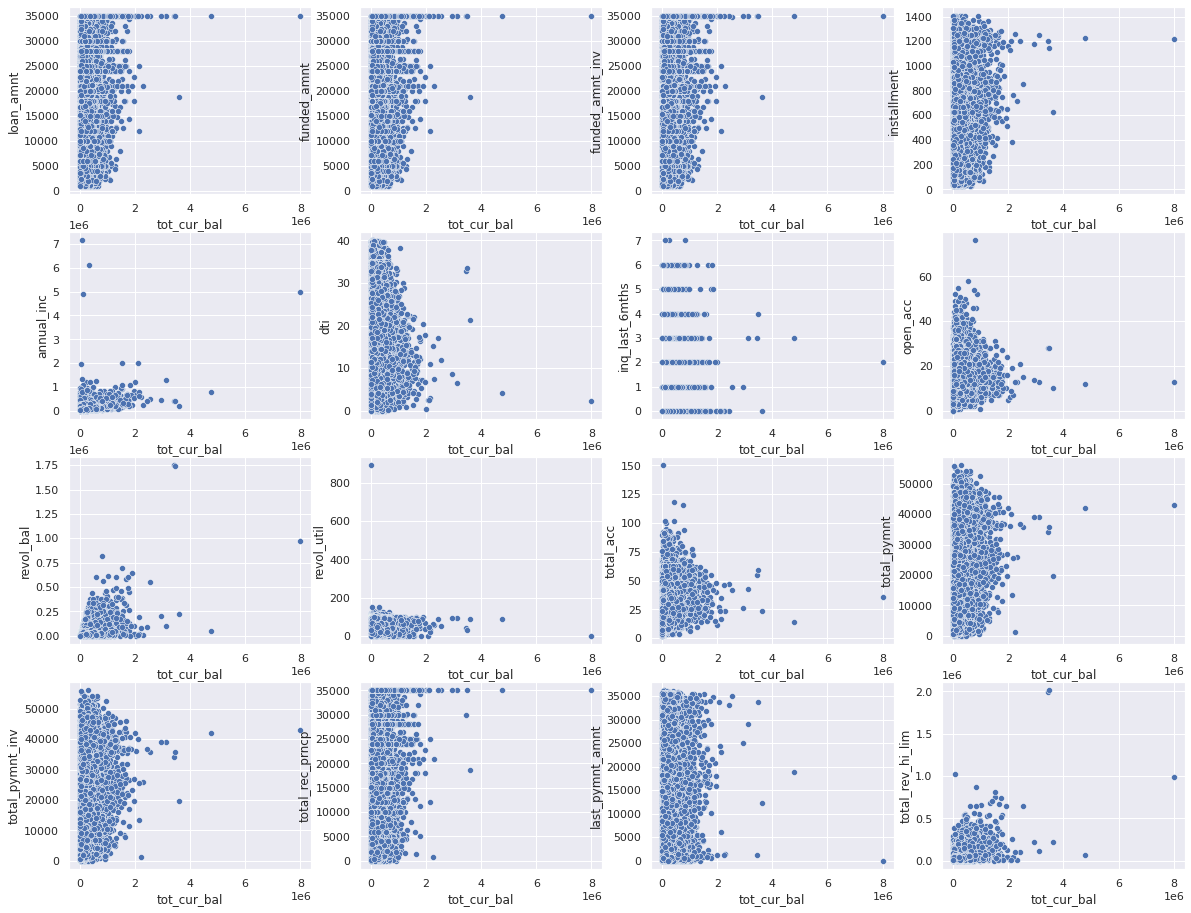

In [29]:
# Create scatter plot of tot_cur_bal related to numeric features
plt.figure(figsize=(20,20))
i = 1
column_scatter = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','inq_last_6mths','open_acc',
                 'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','last_pymnt_amnt',
                 'total_rev_hi_lim']

for a in column_scatter:
    plt.subplot(5,4,i)
    sns.scatterplot(data=df_FE, x='tot_cur_bal', y=a)
    i = i+1

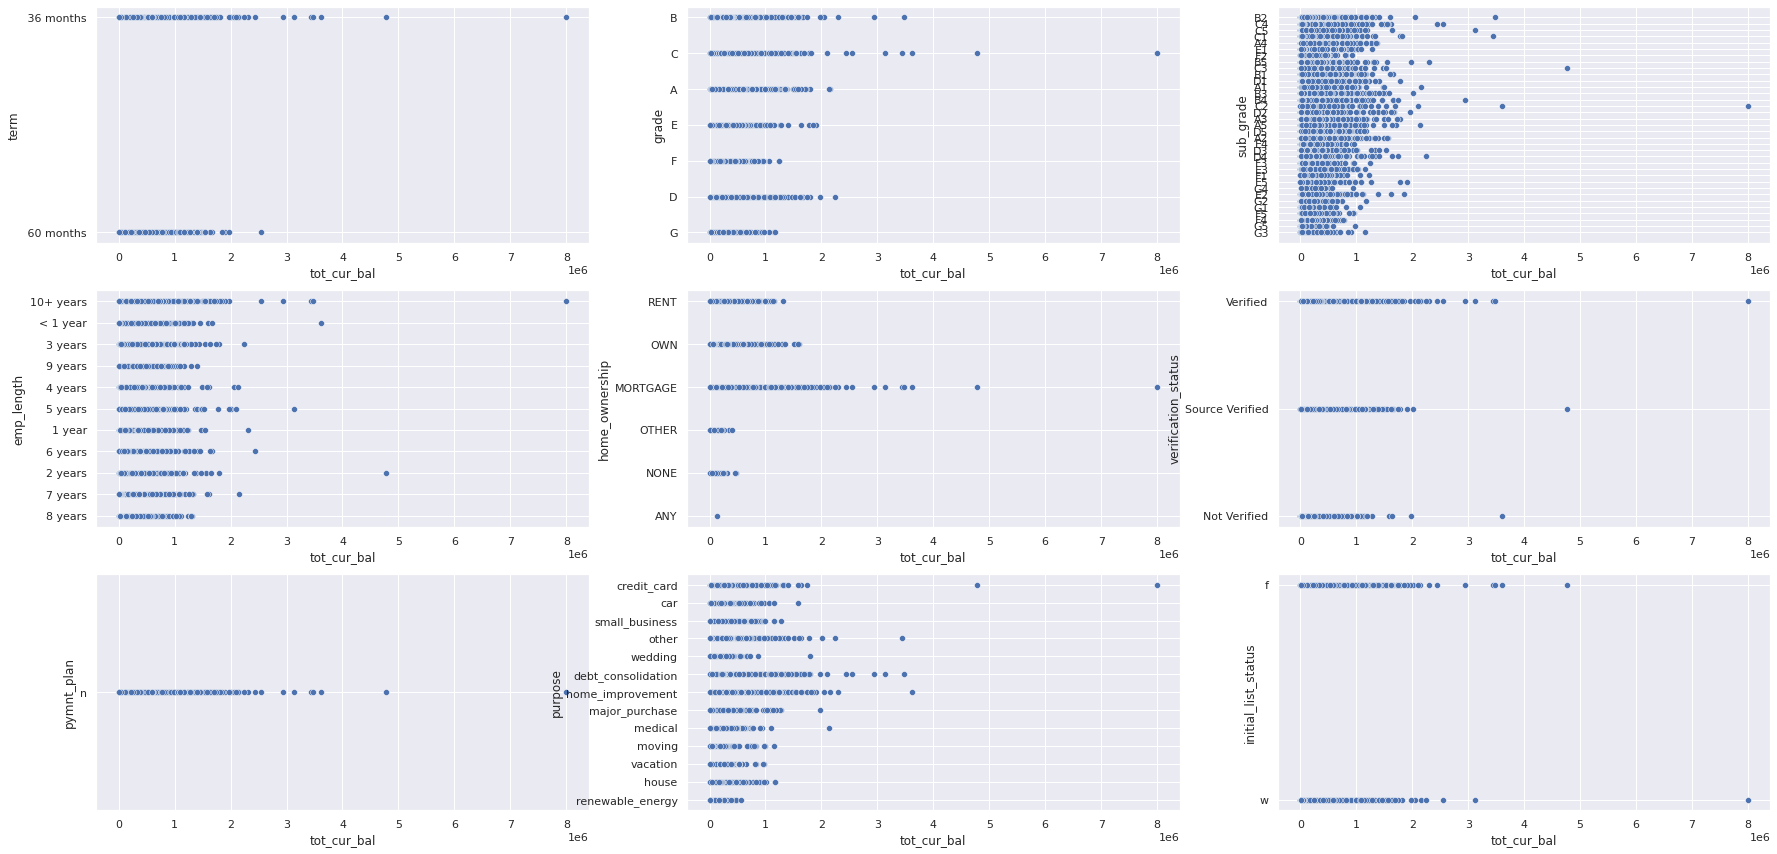

In [30]:
# Create scatter plot of tot_cur_bal related to object features
plt.figure(figsize=(30,20))
i = 1
column_numeric = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','pymnt_plan','purpose','initial_list_status']

for a in column_numeric:
    plt.subplot(4,3,i)
    sns.scatterplot(data=df_FE, x='tot_cur_bal', y=a)
    i = i+1

From scatter plot above, we know that values on column tot_cur_bal is around 0 to 2 x 10^6 related to almost other numeric and object features. This condition happened before handling outliers of tot_cur_bal. So, i decided to fill missing value with median because if outliers handling happened, i think median not change too much than mean value (the number of values > 1 x 10^6 are only 274 data)

In [11]:
# Fill missing value of column tot_cur_bal with median value
df_FE['tot_cur_bal'] = df_FE['tot_cur_bal'].fillna(df_FE['tot_cur_bal'].median())

- **Column total_rev_hi_lim**

In [32]:
df_FE['total_rev_hi_lim'].describe()

count    1.635060e+05
mean     2.924175e+04
std      2.867860e+04
min      0.000000e+00
25%      1.328775e+04
50%      2.210000e+04
75%      3.640000e+04
max      2.013133e+06
Name: total_rev_hi_lim, dtype: float64

In [ ]:
# Check amount of data with condition
df_FE[df_FE['total_rev_hi_lim'] > 1*(10**5)]

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
42686,35000,35000,35000.0,60 months,832.29,C,C3,6 years,MORTGAGE,93000.0,...,50574,50.1,20.0,w,39139.51000,39139.51,35000.00,31648.90,753367.0,101000.0
42858,30000,30000,30000.0,36 months,1088.34,D,D3,10+ years,MORTGAGE,150000.0,...,108765,94.0,20.0,w,15218.83000,15218.83,7506.58,1088.34,345250.0,115500.0
43028,12250,12250,12250.0,36 months,393.38,B,B1,2 years,MORTGAGE,135000.0,...,76126,60.4,28.0,f,13127.88615,13127.89,12250.00,9587.77,1162719.0,126100.0
43318,16000,16000,16000.0,36 months,498.59,A,A3,10+ years,MORTGAGE,105000.0,...,52832,49.8,45.0,w,17299.47000,17299.47,16000.00,10319.21,291623.0,106100.0
43604,22250,22250,22250.0,60 months,595.70,E,E1,3 years,RENT,54000.0,...,16210,12.6,17.0,w,2978.50000,2978.50,1115.44,595.70,25753.0,118100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465765,15000,15000,14900.0,36 months,504.33,B,B4,< 1 year,MORTGAGE,100000.0,...,107502,90.3,34.0,f,17510.88586,17394.15,15000.00,7928.79,644109.0,112800.0
465989,20000,20000,20000.0,60 months,521.24,D,D4,5 years,MORTGAGE,100000.0,...,53473,64.5,31.0,f,4101.13000,4101.13,404.97,260.78,272919.0,121800.0
466011,35000,35000,34975.0,36 months,1223.77,C,C4,5 years,MORTGAGE,270000.0,...,248481,81.5,38.0,f,38354.32289,38326.93,35000.00,29789.83,1093664.0,283800.0
466069,20000,20000,19950.0,36 months,623.23,A,A3,10+ years,MORTGAGE,115000.0,...,58334,41.9,60.0,f,21600.27750,21546.28,20000.00,12878.90,395837.0,139200.0


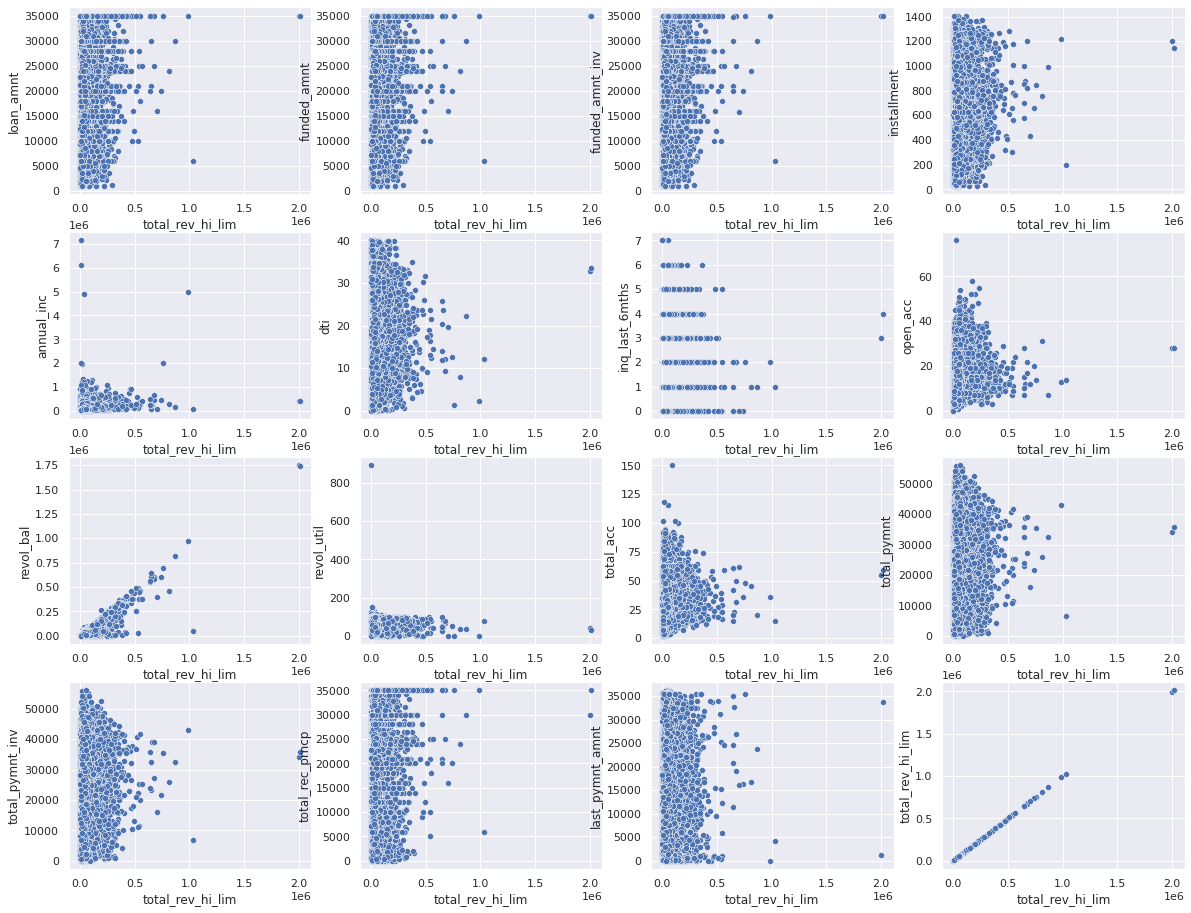

In [33]:
# Create scatter plot of total_rev_hi_lim related to numeric features
plt.figure(figsize=(20,20))
i = 1
column_scatter = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','dti','inq_last_6mths','open_acc',
                 'revol_bal','revol_util','total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','last_pymnt_amnt',
                 'total_rev_hi_lim']

for a in column_scatter:
    plt.subplot(5,4,i)
    sns.scatterplot(data=df_FE, x='total_rev_hi_lim', y=a)
    i = i+1

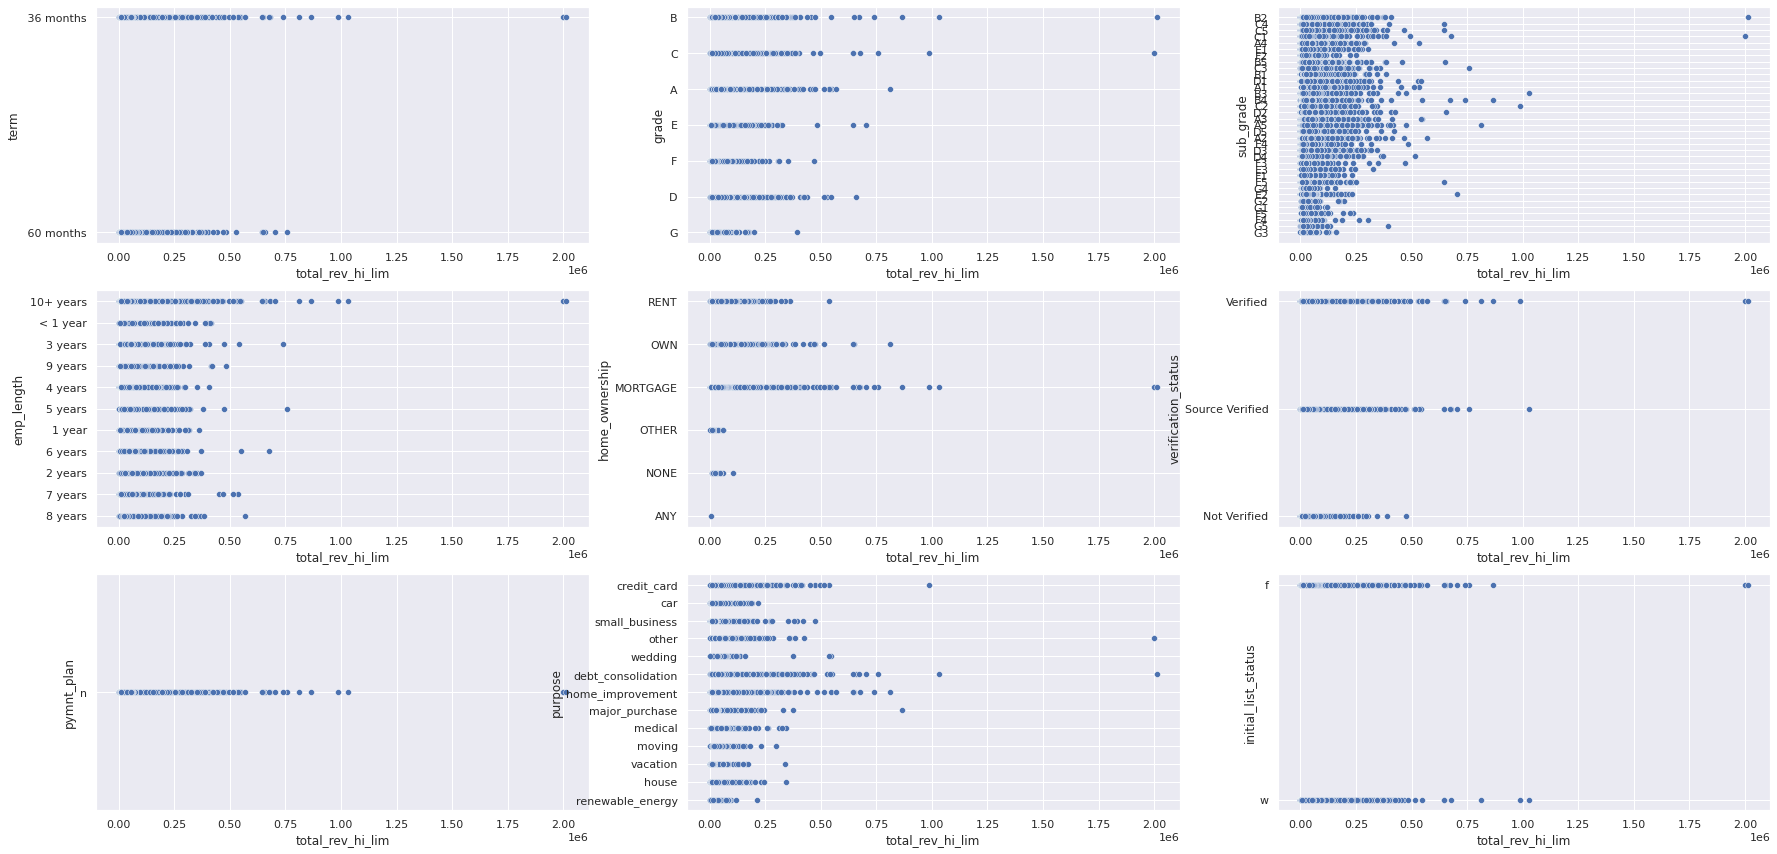

In [34]:
# Create scatter plot of tot_cur_bal related to object features
plt.figure(figsize=(30,20))
i = 1
column_numeric = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','pymnt_plan','purpose','initial_list_status']

for a in column_numeric:
    plt.subplot(4,3,i)
    sns.scatterplot(data=df_FE, x='total_rev_hi_lim', y=a)
    i = i+1

From scatter plot above, it's look same with column tot_cur_bal, but in total_rev_hi_lim column, values spread around 0 to 0.5 x 10^6. If we check values distribution > 10^5 of total_rev_hi_lim column, we can see there are only 3597 data and almost of data spread below value of 10^5. Based on that, i decided to fill missing value with median with value 2.2 x 10^4 (below 10^5).

In [12]:
# Fill missing value of column total_rev_hi_lim with median value
df_FE['total_rev_hi_lim'] = df_FE['total_rev_hi_lim'].fillna(df_FE['total_rev_hi_lim'].median())

### c). Check and handle outliers for numeric features (float64 and int64 data types)

In [13]:
df_outliers = df_FE.copy()

In [37]:
df_outliers.select_dtypes(include=['float64','int64']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229963 entries, 0 to 466283
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   loan_amnt         229963 non-null  int64  
 1   funded_amnt       229963 non-null  int64  
 2   funded_amnt_inv   229963 non-null  float64
 3   installment       229963 non-null  float64
 4   annual_inc        229959 non-null  float64
 5   dti               229963 non-null  float64
 6   inq_last_6mths    229934 non-null  float64
 7   open_acc          229934 non-null  float64
 8   revol_bal         229963 non-null  int64  
 9   revol_util        229737 non-null  float64
 10  total_acc         229934 non-null  float64
 11  total_pymnt       229963 non-null  float64
 12  total_pymnt_inv   229963 non-null  float64
 13  total_rec_prncp   229963 non-null  float64
 14  last_pymnt_amnt   229963 non-null  float64
 15  tot_cur_bal       229963 non-null  float64
 16  total_rev_hi_lim  22

In [14]:
# Outliers check with IQR
def outliers_check(variable):
    global df_outliers
    
    IQR = 'IQR_' + variable
    IQR = df_outliers[variable].quantile(0.75) - df_outliers[variable].quantile(0.25)
    
    lowerlimit = 'lowerlimit_' + variable
    upperlimit = 'upperlimit' + variable
    
    lowerlimit = df_outliers[variable].quantile(0.25) - (1.5*IQR)
    upperlimit = df_outliers[variable].quantile(0.75) + (1.5*IQR)
    
    data_outliers_check = df_outliers[(df_outliers[variable] < lowerlimit) | (df_outliers[variable] > upperlimit)]
    
    sns.set()
    
    fig, axes = plt.subplots(1,2,figsize=(12,5))
    sns.distplot(df_outliers[variable], ax=axes[0])
    sns.boxplot(df_outliers[variable], ax=axes[1])
    
    print('Amount of outliers in', variable, 'column is ', data_outliers_check.shape)

In [15]:
# Outliers handling with IQR
def outliers_handling(variable):
    
    global df_outliers
    
    IQR = 'IQR_' + variable
    IQR = df_outliers[variable].quantile(0.75) - df_outliers[variable].quantile(0.25)
    
    lowerlimit = 'lowerlimit_' + variable
    upperlimit = 'upperlimit' + variable
    
    lowerlimit = df_outliers[variable].quantile(0.25) - (1.5*IQR)
    upperlimit = df_outliers[variable].quantile(0.75) + (1.5*IQR)
    
    df_outliers = df_outliers[(df_outliers[variable] > lowerlimit) & (df_outliers[variable] < upperlimit)]
    
    print('Outliers handling on column', variable, 'successful !')

In [16]:
numeric_features = df_outliers.select_dtypes(include=['float64','int64'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

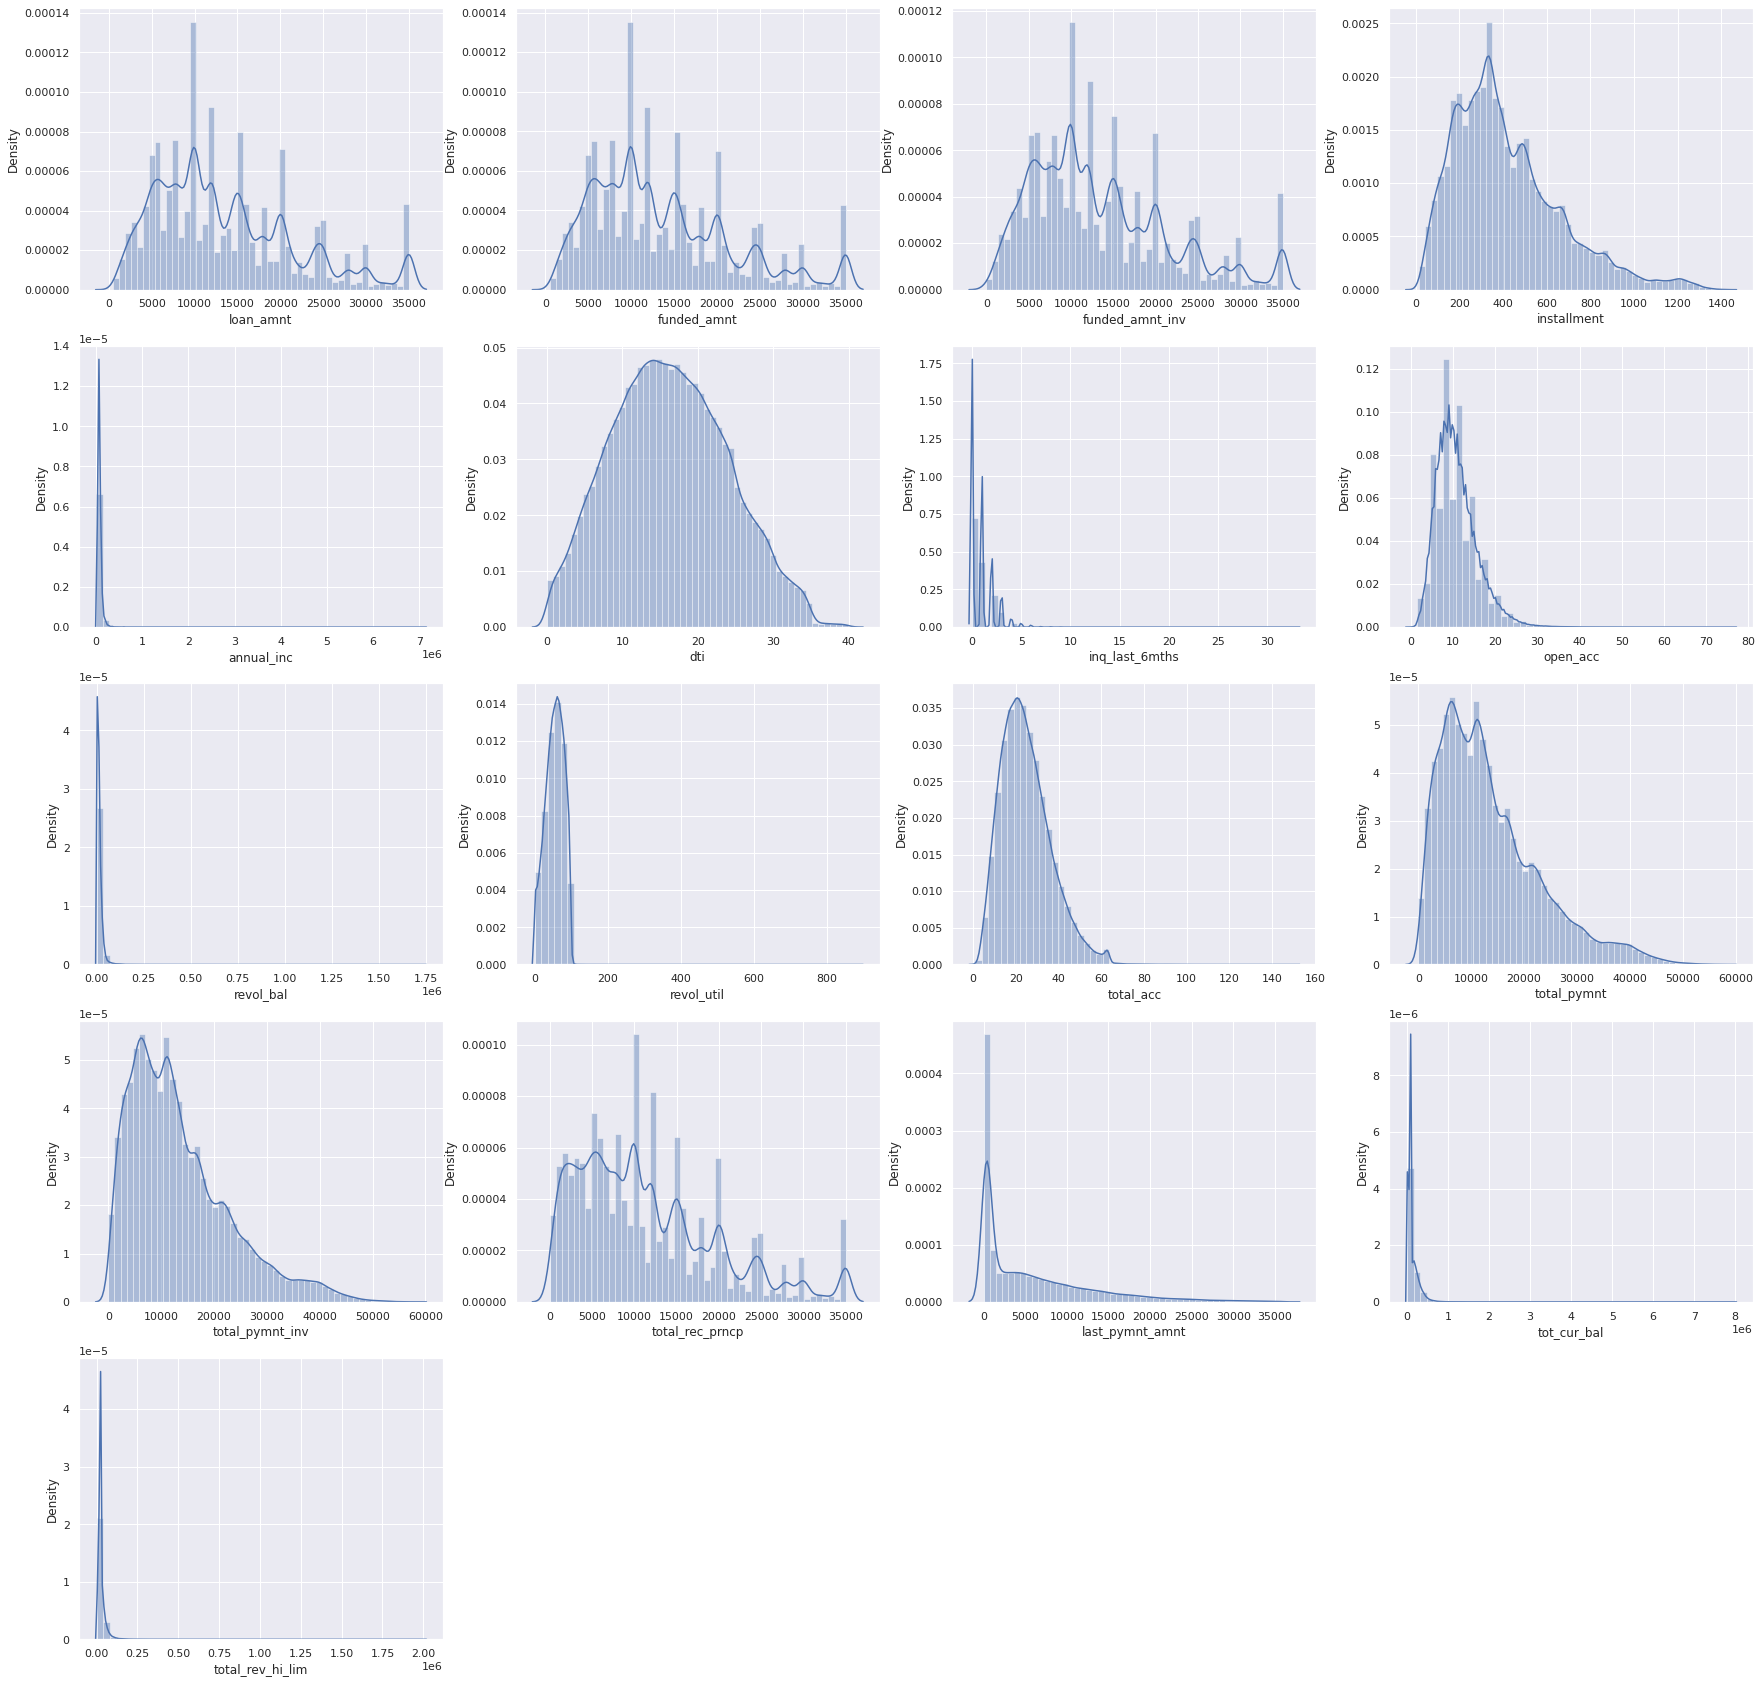

In [41]:
# Outliers check for numeric features using distplot (before outliers handling)
plt.figure(figsize=(30,30))
i = 1
for a in numeric_features.columns:
    plt.subplot(5,4,i)
    sns.distplot(numeric_features[a])
    i=i+1

From distplot above, we know that there are several features in not normal distribution, there are :
annual_inc, last_pymnt_amnt, tot_cur_bal, total_rev_hi_lim, open_acc, revol_bal, revol_util, total_acc, total_pymnt, total_pymnt_inv, installment

In [17]:
# Outliers handling using IQR (def function was stated before this code)
features_to_outliers_handling = ['annual_inc','revol_bal','revol_util','last_pymnt_amnt','tot_cur_bal','total_rev_hi_lim',
                                'total_pymnt_inv','total_acc','open_acc','total_pymnt','installment']

for i in features_to_outliers_handling:
    outliers_handling(i)

Outliers handling on column annual_inc successful !
Outliers handling on column revol_bal successful !
Outliers handling on column revol_util successful !
Outliers handling on column last_pymnt_amnt successful !
Outliers handling on column tot_cur_bal successful !
Outliers handling on column total_rev_hi_lim successful !
Outliers handling on column total_pymnt_inv successful !
Outliers handling on column total_acc successful !
Outliers handling on column open_acc successful !
Outliers handling on column total_pymnt successful !
Outliers handling on column installment successful !


In [43]:
numeric_features = df_outliers.select_dtypes(include=['float64','int64'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

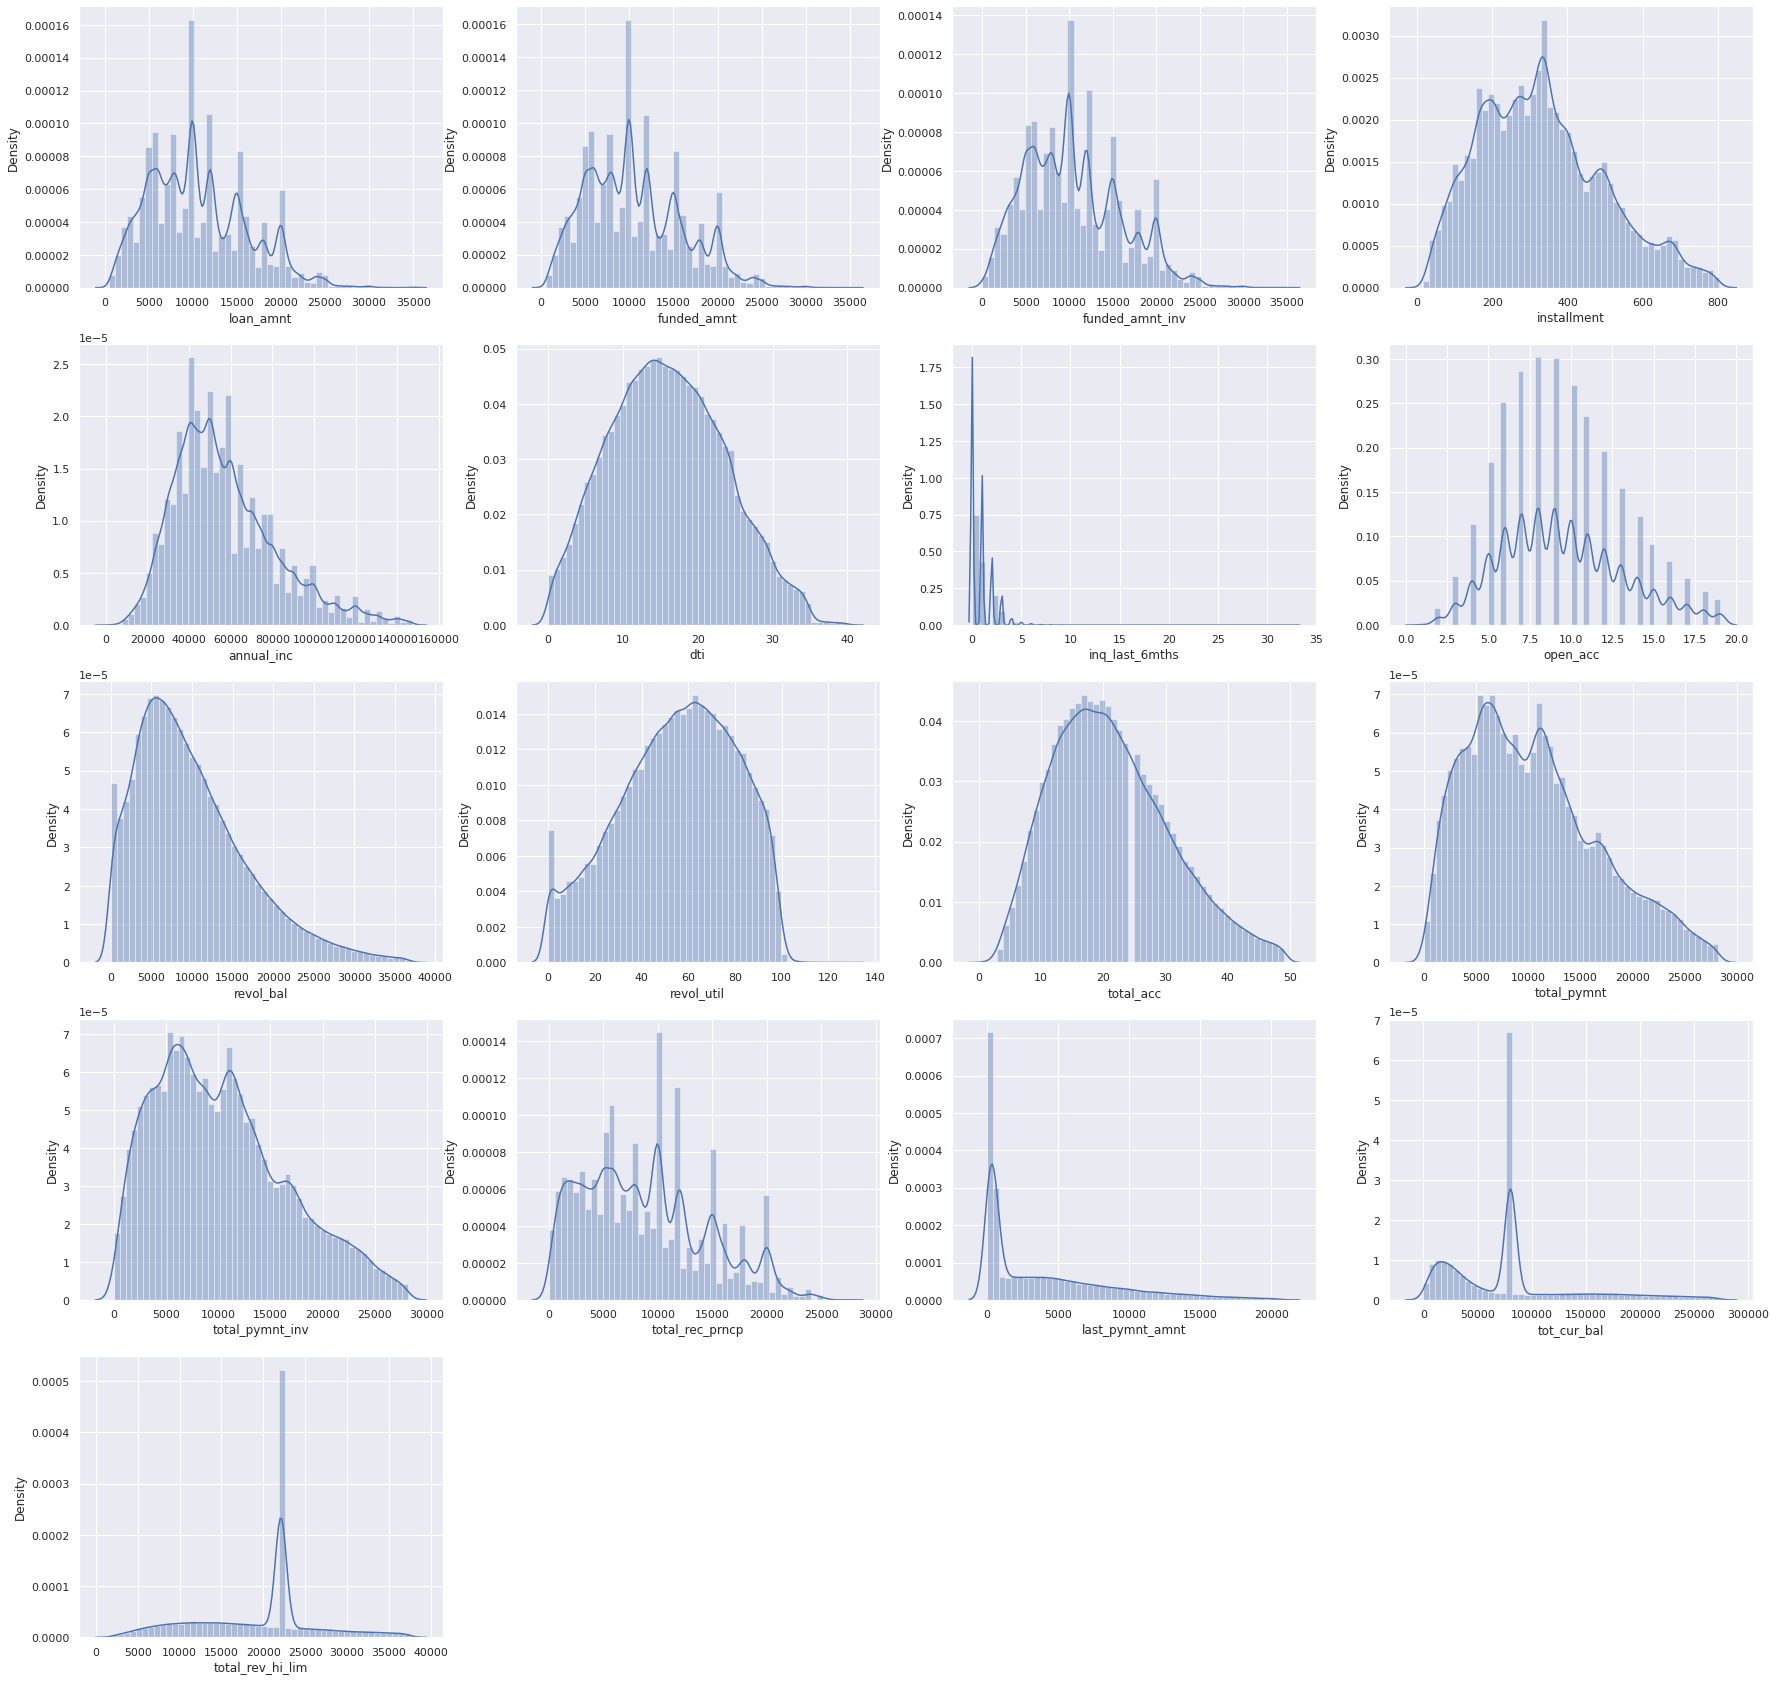

In [44]:
# Outliers check for numeric features using distplot (after outliers handling)
plt.figure(figsize=(30,30))
i = 1
for a in numeric_features.columns:
    plt.subplot(5,4,i)
    sns.distplot(numeric_features[a])
    i=i+1

From distplot above, we can see there are better distribution curve than before outliers handling.

In [45]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151765 entries, 0 to 466278
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            151765 non-null  int64  
 1   funded_amnt          151765 non-null  int64  
 2   funded_amnt_inv      151765 non-null  float64
 3   term                 151765 non-null  object 
 4   installment          151765 non-null  float64
 5   grade                151765 non-null  object 
 6   sub_grade            151765 non-null  object 
 7   emp_length           149915 non-null  object 
 8   home_ownership       151765 non-null  object 
 9   annual_inc           151765 non-null  float64
 10  verification_status  151765 non-null  object 
 11  loan_status          151765 non-null  object 
 12  pymnt_plan           151765 non-null  object 
 13  purpose              151765 non-null  object 
 14  dti                  151765 non-null  float64
 15  inq_last_6mths   

In [46]:
# Re-check missing value
df_outliers.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
installment               0
grade                     0
sub_grade                 0
emp_length             1850
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
pymnt_plan                0
purpose                   0
dti                       0
inq_last_6mths            0
open_acc                  0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
last_pymnt_amnt           0
tot_cur_bal               0
total_rev_hi_lim          0
dtype: int64

There are only 1850 missing value of column emp_length. If we take a ratio of 1850 with total data (approximately 150000), missing value is only approximately 1% of total data. So, i decided to just remove missing values.

In [18]:
# Drop NaN values on column emp_length
df_outliers = df_outliers.dropna(axis=0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

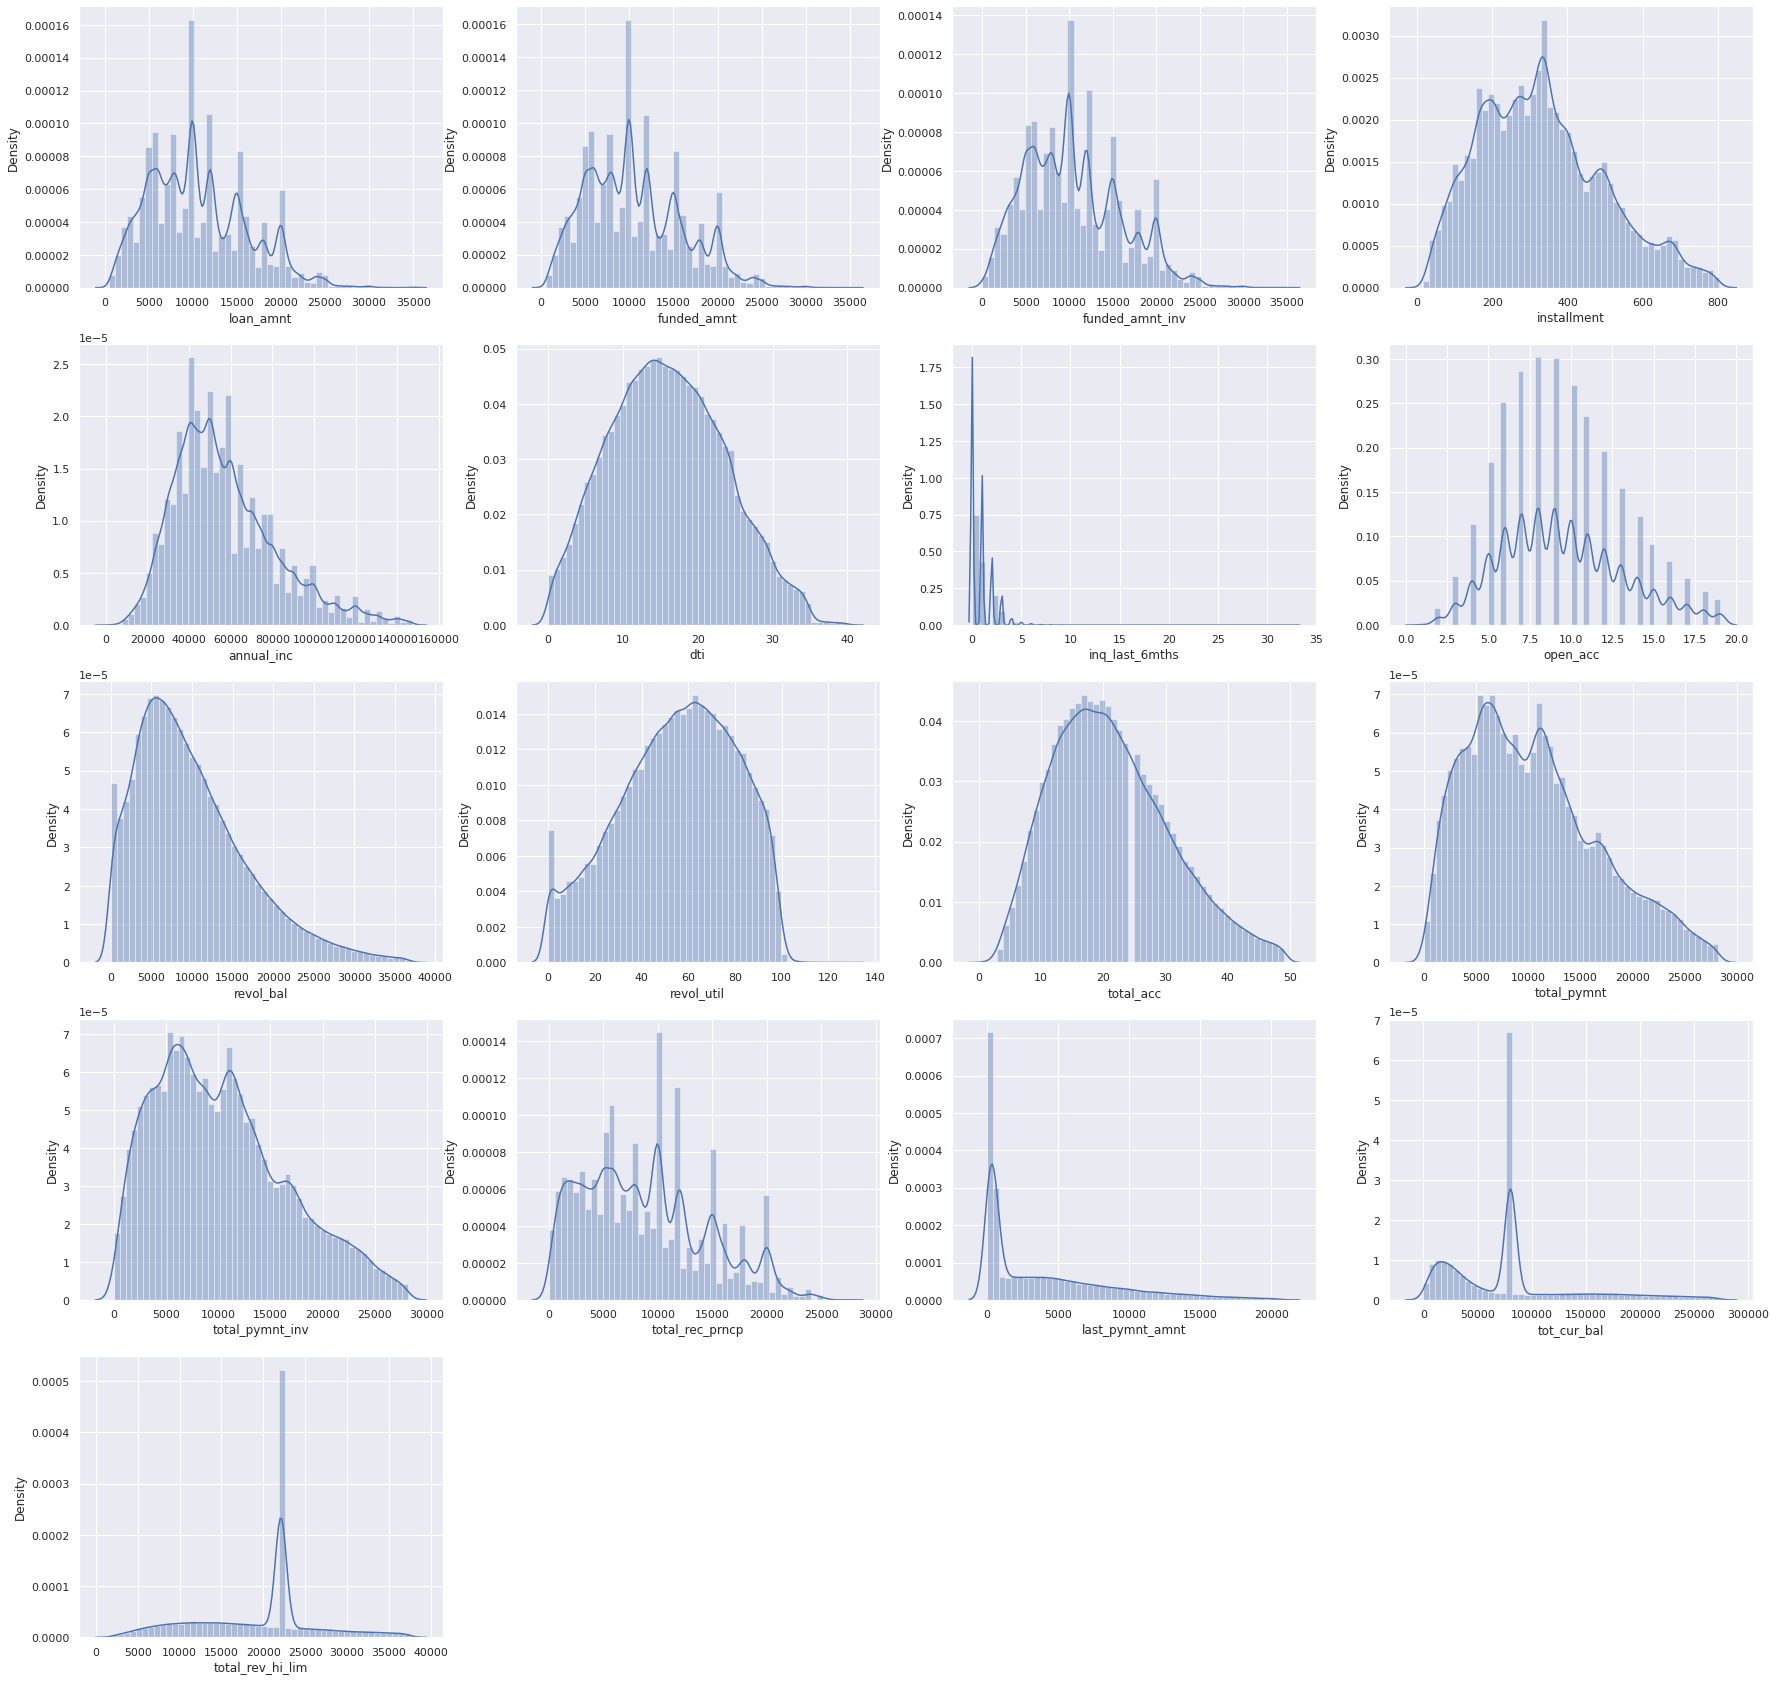

In [48]:
# Re-check data distribution after added data of column emp_length
plt.figure(figsize=(30,30))
i = 1
for a in numeric_features.columns:
    plt.subplot(5,4,i)
    sns.distplot(numeric_features[a])
    i=i+1

We can see there is not much change of numeric features data distribution. So, we can go to next part 

### d). Change and manipulation data on each features

In this section, i decided to changed/manipulated data such remove 'months' string in column term, change data type on column inq_last_6mths to int64, etc.

In [19]:
df_CM = df_outliers.copy()

In [50]:
df_CM.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,162.87,B,B2,10+ years,RENT,24000.0,...,13648,83.7,9.0,f,5861.071414,5831.78,5000.00,171.62,80460.5,22100.0
1,2500,2500,2500.0,60 months,59.83,C,C4,< 1 year,RENT,30000.0,...,1687,9.4,4.0,f,1008.710000,1008.71,456.46,119.66,80460.5,22100.0
2,2400,2400,2400.0,36 months,84.33,C,C5,10+ years,RENT,12252.0,...,2956,98.5,10.0,f,3003.653644,3003.65,2400.00,649.91,80460.5,22100.0
3,10000,10000,10000.0,36 months,339.31,C,C1,10+ years,RENT,49200.0,...,5598,21.0,37.0,f,12226.302210,12226.30,10000.00,357.48,80460.5,22100.0
5,5000,5000,5000.0,36 months,156.46,A,A4,3 years,RENT,36000.0,...,7963,28.3,12.0,f,5631.377753,5631.38,5000.00,161.03,80460.5,22100.0


- **Column term**

In [51]:
df_CM['term'].value_counts()

 36 months    124911
 60 months     25004
Name: term, dtype: int64

From data on column term, we can manipulate data by remove 'months' string.

In [20]:
df_CM['term_mths'] = df_CM['term'].str.split().str[0]

In [53]:
df_CM['term_mths'].value_counts()

36    124911
60     25004
Name: term_mths, dtype: int64

In [21]:
# Change data types to int
df_CM['term_mths'] = df_CM['term_mths'].astype('int64')

In [22]:
# drop previous column term
df_CM = df_CM.drop(['term'], axis=1)

- **Column total_pymnt**

Colum total_pymnt need to rounded for 2 numbers after comma because numeric values of money don't provide currency with precision up to 6 numeric values after comma

In [56]:
df_CM['total_pymnt'].values

array([ 5861.071414,  1008.71    ,  3003.653644, ...,  6865.246957,
        6865.5     , 12394.1652  ])

In [23]:
# Take only 2 numbers after comma
df_CM['total_pymnt'] = np.round(df_CM['total_pymnt'].values,2)

In [58]:
df_CM.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,initial_list_status,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,term_mths
0,5000,5000,4975.0,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,83.7,9.0,f,5861.07,5831.78,5000.00,171.62,80460.5,22100.0,36
1,2500,2500,2500.0,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,9.4,4.0,f,1008.71,1008.71,456.46,119.66,80460.5,22100.0,60
2,2400,2400,2400.0,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,98.5,10.0,f,3003.65,3003.65,2400.00,649.91,80460.5,22100.0,36
3,10000,10000,10000.0,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,21.0,37.0,f,12226.30,12226.30,10000.00,357.48,80460.5,22100.0,36
5,5000,5000,5000.0,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,28.3,12.0,f,5631.38,5631.38,5000.00,161.03,80460.5,22100.0,36


- **Column loan_status**

In [59]:
df_CM['loan_status'].value_counts()

Fully Paid                                             118767
Charged Off                                             29172
Does not meet the credit policy. Status:Fully Paid       1417
Does not meet the credit policy. Status:Charged Off       559
Name: loan_status, dtype: int64

we can group loan status to be 2 category, fully paid and charged off.

In [24]:
# Change column loan_status data
loan_status_group = {'Does not meet the credit policy. Status:Fully Paid' : 'Fully Paid',
                    'Does not meet the credit policy. Status:Charged Off' : 'Charged Off'}

df_CM['loan_status'] = df_CM['loan_status'].replace(loan_status_group)

In [61]:
df_CM['loan_status'].value_counts()

Fully Paid     120184
Charged Off     29731
Name: loan_status, dtype: int64

### e). Label Encoding

In [25]:
df_LE = df_CM.copy()

In [63]:
# Show object columns only
df_LE.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149915 entries, 0 to 466278
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   grade                149915 non-null  object
 1   sub_grade            149915 non-null  object
 2   emp_length           149915 non-null  object
 3   home_ownership       149915 non-null  object
 4   verification_status  149915 non-null  object
 5   loan_status          149915 non-null  object
 6   pymnt_plan           149915 non-null  object
 7   purpose              149915 non-null  object
 8   initial_list_status  149915 non-null  object
dtypes: object(9)
memory usage: 11.4+ MB


In [64]:
df_LE.select_dtypes(include=['object']).head(10)

,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,initial_list_status
0,B,B2,10+ years,RENT,Verified,Fully Paid,n,credit_card,f
1,C,C4,< 1 year,RENT,Source Verified,Charged Off,n,car,f
2,C,C5,10+ years,RENT,Not Verified,Fully Paid,n,small_business,f
3,C,C1,10+ years,RENT,Source Verified,Fully Paid,n,other,f
5,A,A4,3 years,RENT,Source Verified,Fully Paid,n,wedding,f
7,E,E1,9 years,RENT,Source Verified,Fully Paid,n,car,f
8,F,F2,4 years,OWN,Source Verified,Charged Off,n,small_business,f
9,B,B5,< 1 year,RENT,Verified,Charged Off,n,other,f
10,C,C3,5 years,OWN,Not Verified,Fully Paid,n,debt_consolidation,f
11,B,B5,10+ years,OWN,Source Verified,Fully Paid,n,debt_consolidation,f


In [26]:
# Separate ordinal and nominal object
features_nominal = ['pymnt_plan','home_ownership','purpose','initial_list_status']
features_ordinal = ['grade','sub_grade','emp_length','verification_status']

In [27]:
# Label encoding for ordinal features

ordinal_LE = {'grade' : {'A' : 7, 'B' : 6, 'C' : 5, 'D' : 4, 'E' : 3, 'F' : 2, 'G' : 1},
              'sub_grade' : {'A1' : 35, 'A2' : 34, 'A3' : 33, 'A4' : 32, 'A5': 31,
                            'B1' : 30, 'B2' : 29, 'B3' : 28, 'B4' : 27, 'B5': 26,
                            'C1' : 25, 'C2' : 24, 'C3' : 23, 'C4' : 22, 'C5': 21,
                            'D1' : 20, 'D2' : 19, 'D3' : 18, 'D4' : 17, 'D5': 16,
                            'E1' : 15, 'E2' : 14, 'E3' : 13, 'E4' : 12, 'E5': 11,
                            'F1' : 10, 'F2' : 9, 'F3' : 8, 'F4' : 7, 'F5': 6,
                            'G1' : 5, 'G2' : 4, 'G3' : 3, 'G4' : 2, 'G5': 1,},
              'emp_length' : {'10+ years' : 11, '9 years' : 10, '8 years' : 9, '7 years' : 8,
                             '6 years' : 7, '5 years' : 6, '4 years' : 5, '3 years' : 4,
                             '2 years' : 3, '1 year' : 2, '< 1 year' : 1},
              'verification_status' : {'Verified' : 3, 'Source Verified' : 2, 'Not Verified' : 1}}

df_LE = df_LE.replace(ordinal_LE)

In [28]:
# Label encoding for nominal features using pd.get_dummies
df_LE = pd.get_dummies(df_LE, columns=features_nominal, drop_first=True)

In [31]:
df_LE.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_length,annual_inc,verification_status,loan_status,...,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,5000,5000,4975.0,162.87,6,29,11,24000.0,3,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,59.83,5,22,1,30000.0,2,Charged Off,...,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,84.33,5,21,11,12252.0,1,Fully Paid,...,0,0,0,0,0,0,1,0,0,0
3,10000,10000,10000.0,339.31,5,25,11,49200.0,2,Fully Paid,...,0,0,0,0,1,0,0,0,0,0
5,5000,5000,5000.0,156.46,7,32,4,36000.0,2,Fully Paid,...,0,0,0,0,0,0,0,0,1,0


In [32]:
# final data
df_final = df_LE.copy()

## 4. Modelling

In [33]:
# Change status of loan_status feature (1 = 'Fully Paid', 0 = 'Charged Off')
loan_status_change = {'Fully Paid' : 1, 'Charged Off' : 0}

df_final['loan_status'] = df_final['loan_status'].replace(loan_status_change)

In [34]:
df_final['loan_status'].value_counts()

1    120184
0     29731
Name: loan_status, dtype: int64

In [35]:
# Separate predictor and target feature
X = df_final.drop(['loan_status'], axis=1, inplace=False)
y = df_final['loan_status']

In [36]:
# Import library for modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score

In [37]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [38]:
# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Algorithms scores
algorithms = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier,
             KNeighborsClassifier]
algorithms_name = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier',
                  'KNearestNeighbors']

Algorithms_Score = []

KFold_models = KFold(10)

for i in algorithms:
    model = i()
    model.fit(X_train_scaled,y_train)
    prediction = model.predict(X_test_scaled)
    score = cross_val_score(model,X,y,cv=KFold_models).mean()
    
    Algorithms_Score.append(score)
    
    
model_score = pd.DataFrame({
    'Algorithms' : algorithms_name,
    'Score' : Algorithms_Score
})

In [77]:
model_score

,Algorithms,Score
0,LogisticRegression,0.997118
1,DecisionTreeClassifier,0.996758
2,RandomForestClassifier,0.995097
3,KNearestNeighbors,0.969143


Based on models score above, i decided to choose LogisticRegression with highest score

## 5. Evaluate model with AUC and ROC curve

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [54]:
# AUC ROC curve for logistic regression
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)
prediction_LR = LR.predict_proba(X_test_scaled)
prediction_auc_LR = prediction_LR[:,1]

FPR_LR, TPR_LR, Threshold_LR = roc_curve(y_test, prediction_auc_LR)
roc_auc_score_LR = auc(FPR_LR, TPR_LR)

print('ROC score for logistic regression: ', roc_auc_score_LR)

# AUC ROC for decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)
prediction_DTC = DTC.predict_proba(X_test_scaled)
prediction_auc_DTC = prediction_DTC[:,1]

FPR_DTC, TPR_DTC, Threshold_DTC = roc_curve(y_test, prediction_auc_DTC)
roc_auc_score_DTC = auc(FPR_DTC, TPR_DTC)

print('ROC score for decision tree classifier: ', roc_auc_score_DTC)

# AUC ROC for random forest classifier
RFC = RandomForestClassifier()
RFC.fit(X_train_scaled, y_train)
prediction_RFC = RFC.predict_proba(X_test_scaled)
prediction_auc_RFC = prediction_RFC[:,1]

FPR_RFC, TPR_RFC, Threshold_RFC = roc_curve(y_test, prediction_auc_RFC)
roc_auc_score_RFC = auc(FPR_RFC, TPR_RFC)

print('ROC score for random forest classifier: ', roc_auc_score_RFC)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC score for logistic regression:  0.9989420354833889
ROC score for decision tree classifier:  0.995234493354794
ROC score for random forest classifier:  0.9996403400485032


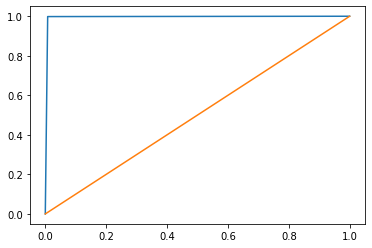

In [57]:
plt.plot(FPR_DTC,TPR_DTC)
plt.plot([0,1],[0,1])

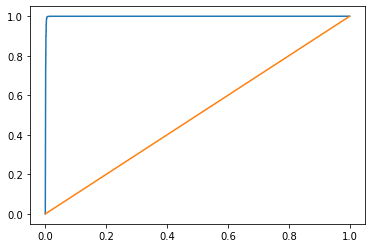

In [58]:
plt.plot(FPR_LR,TPR_LR)
plt.plot([0,1],[0,1])

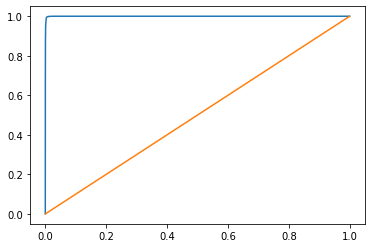

In [59]:
plt.plot(FPR_RFC,TPR_RFC)
plt.plot([0,1],[0,1])

## 6. Features importance

In [62]:
# Feature importance with random forest classifier
RFC_FI = RandomForestClassifier()
RFC_FI.fit(X_train_scaled, y_train)
RFC_FI_score = RFC_FI.feature_importances_

df_RFC_FI = pd.DataFrame(RFC_FI_score, columns=['Feature Importance Score'])
df_RFC_FI['Features'] = X.columns

In [63]:
df_RFC_FI

,Feature Importance Score,Features
0,0.069587,loan_amnt
1,0.081124,funded_amnt
2,0.073935,funded_amnt_inv
3,0.057822,installment
4,0.010072,grade
5,0.014993,sub_grade
6,0.001403,emp_length
7,0.003480,annual_inc
8,0.001955,verification_status
9,0.004228,dti


<AxesSubplot:xlabel='Feature Importance Score', ylabel='Features'>

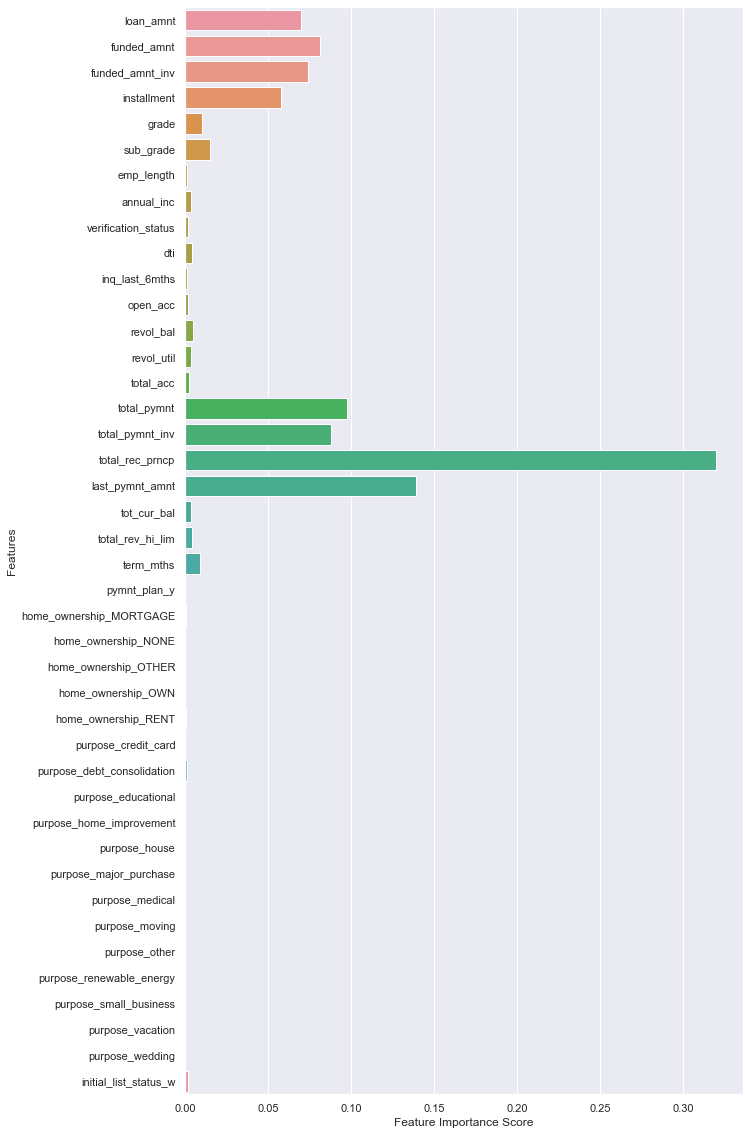

In [68]:
plt.figure(figsize=(10,20))
sns.set()
sns.barplot(data=df_RFC_FI, x='Feature Importance Score', y='Features')